In [2]:
import numpy as np
import json
import random
import matplotlib.pyplot as plt

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress


In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving lemmatized-tokenized.json to lemmatized-tokenized.json
User uploaded file "lemmatized-tokenized.json" with length 10568301 bytes


In [0]:
data = json.load(open('lemmatized-tokenized.json'))
doc_ids = np.array(list(dict(data).keys()))

In [0]:
def doc2vec(data, doc_ids, embedding_size=50, window_size=2, min_count=1, workers=4):
    docs = list(data.values())
    documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(docs)]
    model = Doc2Vec(documents, 
                    vector_size=embedding_size, 
                    window=window_size, 
                    min_count=min_count, 
                    workers=workers)
    return np.array([model.infer_vector(data[key]) for key in doc_ids])

def bags_of_words(data, doc_ids):
    docs = [' '.join(data[key]) for key in doc_ids]
    model = CountVectorizer().fit_transform(docs)
    counts = model.toarray()
    return counts / np.linalg.norm(counts)

def tfidf(data, doc_ids, use_idf=True):
    docs = [' '.join(data[key]) for key in doc_ids]
    model = TfidfVectorizer(use_idf=use_idf).fit_transform(docs)
    counts = model.toarray()
    return counts / np.linalg.norm(counts)

In [0]:
def cluster(vectors, doc_ids, id2doc, n_clusters=10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(vectors)

    doc_ids_clusters, doc_clusters, variances = [], [], []
    for i in range(n_clusters):
        doc_ids_clusters.append(doc_ids[kmeans.labels_ == i])
        doc_clusters.append([id2doc[key] for key in doc_ids[kmeans.labels_ == i]])
        variances.append(variance(vectors[kmeans.labels_ == i]))
    
    print('cluster variance:', variances)
    print('cluster size:', [len(c) for c in doc_clusters])
    
    return doc_ids_clusters, doc_clusters

def variance(vectors):
    return np.mean(np.var(vectors, axis=0))

# https://www.datacamp.com/community/tutorials/wordcloud-python
def make_wordcloud(docs):
    wordcloud = WordCloud().generate(' '.join([token for d in docs for token in d]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [0]:
def spectralcluster(vectors, doc_ids, id2doc, n_clusters=10):
    sepctralclustering = SpectralClustering(
        n_clusters=n_clusters, 
         assign_labels="discretize",
        random_state=0
    ).fit(vectors)

    doc_ids_clusters, doc_clusters, variances = [], [], []
    for i in range(n_clusters):
          doc_ids_clusters.append(doc_ids[sepctralclustering .labels_ == i])
          doc_clusters.append([id2doc[key] for key in doc_ids[sepctralclustering .labels_ == i]])
          variances.append(variance(vectors[sepctralclustering .labels_ == i]))
    
    print('cluster variance:', variances)
    print('cluster size:', [len(c) for c in doc_clusters])
    
    return doc_ids_clusters, doc_clusters

In [0]:
def show_wordclouds_spectralcluster(vecs, doc_ids, data, n_clusters):
  id_clusters, doc_clusters = spectralcluster(vecs, doc_ids, data, n_clusters=n_clusters)
  for i in range(n_clusters):
    print('Pages in cluster:', [x[6:] for x in id_clusters[i][:10]])
    make_wordcloud(doc_clusters[i])

In [0]:
# doc2vec
d2v_vecs = doc2vec(data, doc_ids)

cluster variance: [0.034877628, 0.03765551, 0.04869352, 0.01687532, 0.025814774]
cluster size: [29, 56, 298, 2, 9615]
Pages in cluster: ['Leonardo_da_Vinci', 'Vincent_van_Gogh', 'Aristotle', 'Friedrich_Nietzsche', 'Charles_Darwin', 'Noam_Chomsky', 'Paul_the_Apostle', 'Immanuel_Kant', 'Ada_Lovelace', 'Gottfried_Wilhelm_Leibniz']


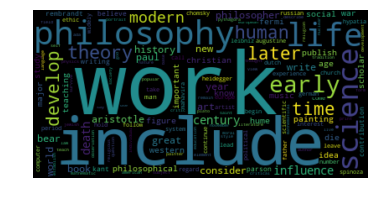

Pages in cluster: ['Elizabeth_I_of_England', 'Henry_VIII_of_England', 'Robert_the_Bruce', 'Louis_XIV_of_France', 'Anne,_Queen_of_Great_Britain', 'Cleopatra', 'Anne_Boleyn', 'Charles_I_of_England', 'James_VI_and_I', 'Charles_II_of_England']


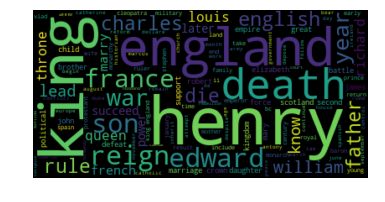

Pages in cluster: ['Donald_Trump', 'John_McCain', 'Winston_Churchill', 'Barack_Obama', 'Adolf_Hitler', 'Brett_Kavanaugh', 'Mahatma_Gandhi', 'George_W._Bush', 'John_F._Kennedy', 'Abraham_Lincoln']


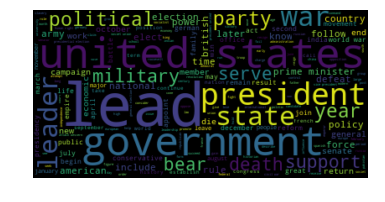

Pages in cluster: ['Napoleon', 'Benito_Mussolini']


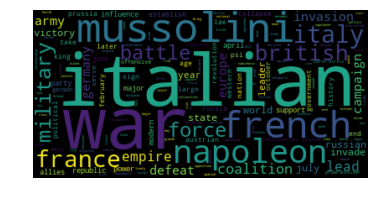

Pages in cluster: ['Cardi_B', 'Louis_Tomlinson', 'Elizabeth_II', 'Freddie_Mercury', 'Cristiano_Ronaldo', 'XXXTentacion', 'Lionel_Messi', 'Elon_Musk', 'Stephen_Hawking', 'LeBron_James']


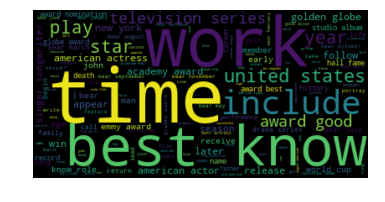

In [29]:
show_wordclouds_spectralcluster(d2v_vecs, doc_ids, data, n_clusters=5)

In [0]:
# bags of words
bow_vecs = bags_of_words(data, doc_ids)

cluster variance: [3.5286158021344884e-09, 2.6844516661561003e-09, 1.7496544556314936e-09, 2.3416322605586133e-09, 5.775706402153896e-10]
cluster size: [1295, 1088, 1648, 915, 5054]
Pages in cluster: ['Elizabeth_II', 'Elon_Musk', 'Stephen_Hawking', 'Donald_Trump', 'George_H._W._Bush', 'Queen_Victoria', 'Stan_Lee', 'John_McCain', 'Princess_Margaret,_Countess_of_Snowdon', 'Charles,_Prince_of_Wales']


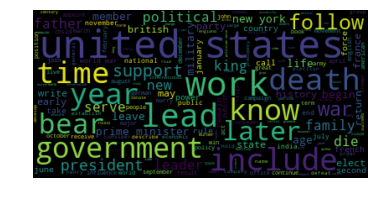

Pages in cluster: ['Cristiano_Ronaldo', 'Lionel_Messi', 'LeBron_James', 'Dwayne_Johnson', 'Michael_Jordan', 'Tom_Brady', 'Kylian_Mbapp%C3%A9', 'Mohamed_Salah', 'Conor_McGregor', 'Roger_Federer']


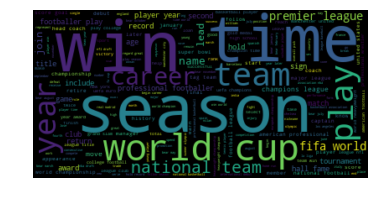

Pages in cluster: ['Jason_Momoa', 'Priyanka_Chopra', 'Sridevi', 'Sylvester_Stallone', 'Tom_Cruise', 'Jennifer_Aniston', 'Clint_Eastwood', 'Ryan_Reynolds', 'Scarlett_Johansson', 'Chris_Hemsworth']


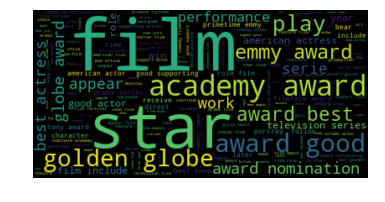

Pages in cluster: ['Cardi_B', 'Louis_Tomlinson', 'Freddie_Mercury', 'XXXTentacion', 'Ariana_Grande', '6ix9ine', 'Avicii', 'Donald_Glover', 'Nick_Jonas', 'Post_Malone']


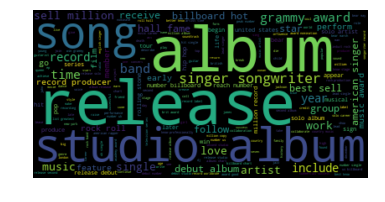

Pages in cluster: ['Anthony_Bourdain', 'Antonio_Maria_Magro', 'Meghan,_Duchess_of_Sussex', 'Kim_Kardashian', 'Pete_Davidson', 'Michael_B._Jordan', 'Khabib_Nurmagomedov', 'Burt_Reynolds', 'Andrew_Cunanan', 'Gianni_Versace']


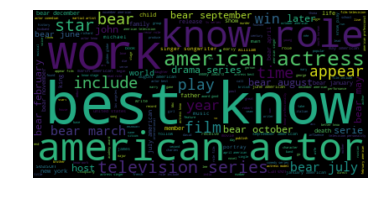

In [30]:
show_wordclouds_spectralcluster(bow_vecs, doc_ids, data, n_clusters=5)

cluster variance: [3.0860084330643617e-09, 4.6035753544980074e-10, 2.6056339291600003e-09, 3.308058140280451e-09, 1.5458475686717288e-09, 1.7836529727893903e-09, 2.1540748564369124e-09, 2.3162605928078174e-09, 1.067265436367883e-09, 1.6221644507627243e-09]
cluster size: [987, 3474, 377, 602, 715, 507, 470, 727, 1349, 792]
Pages in cluster: ['Elizabeth_II', 'Freddie_Mercury', 'Elon_Musk', 'Stephen_Hawking', 'Anthony_Bourdain', 'Queen_Victoria', 'Stan_Lee', 'Princess_Margaret,_Countess_of_Snowdon', 'Charles,_Prince_of_Wales', 'Prince_Philip,_Duke_of_Edinburgh']


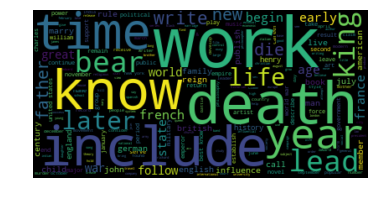

Pages in cluster: ['Antonio_Maria_Magro', 'Pete_Davidson', 'Andrew_Cunanan', 'Gianni_Versace', 'Hailey_Baldwin', 'Jeffrey_Dahmer', 'Dolores_O%27Riordan', 'John_Paul_Getty_III', 'Lisa_Bonet', 'Chadwick_Boseman']


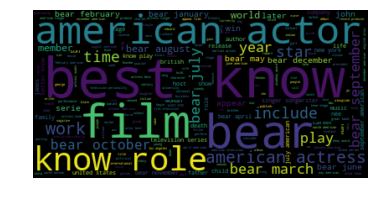

Pages in cluster: ['Dwayne_Johnson', 'Tonya_Harding', 'Jeff_Bezos', 'Khabib_Nurmagomedov', 'Conor_McGregor', 'Roger_Federer', 'John_Cena', 'Anthony_Joshua', 'Serena_Williams', 'Muhammad_Ali']


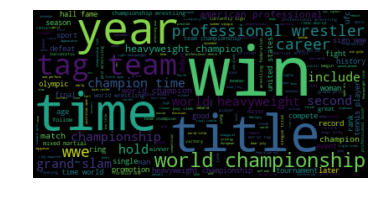

Pages in cluster: ['Donald_Trump', 'George_H._W._Bush', 'John_McCain', 'Winston_Churchill', 'Barack_Obama', 'P._T._Barnum', 'Brett_Kavanaugh', 'George_W._Bush', 'John_F._Kennedy', 'Abraham_Lincoln']


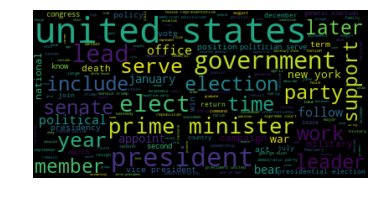

Pages in cluster: ['Tom_Cruise', 'Demi_Lovato', 'Scarlett_Johansson', 'Emily_Blunt', 'Bradley_Cooper', 'Leonardo_DiCaprio', 'Rami_Malek', 'Ellen_DeGeneres', 'Elizabeth_Olsen', 'Robin_Williams']


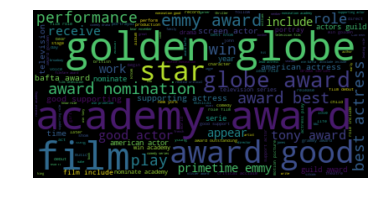

Pages in cluster: ['LeBron_James', 'Michael_Jordan', 'Tom_Brady', 'Stephen_Curry', 'Shaquille_O%27Neal', 'Kobe_Bryant', 'Nick_Foles', 'O._J._Simpson', 'Kevin_Durant', 'Patrick_Mahomes']


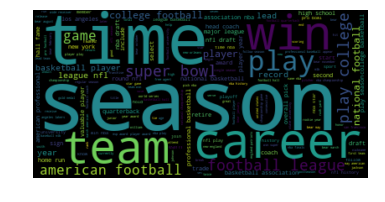

Pages in cluster: ['Cristiano_Ronaldo', 'Lionel_Messi', 'Kylian_Mbapp%C3%A9', 'Mohamed_Salah', 'Virat_Kohli', 'Neymar', 'Harry_Kane', 'Zlatan_Ibrahimovi%C4%87', 'David_Beckham', 'Pel%C3%A9']


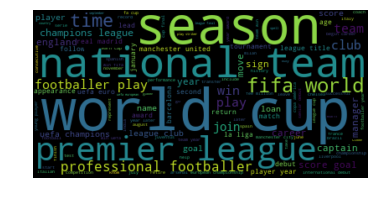

Pages in cluster: ['Cardi_B', 'Louis_Tomlinson', 'XXXTentacion', 'Ariana_Grande', '6ix9ine', 'Avicii', 'Donald_Glover', 'Nick_Jonas', 'Post_Malone', 'Michael_Jackson']


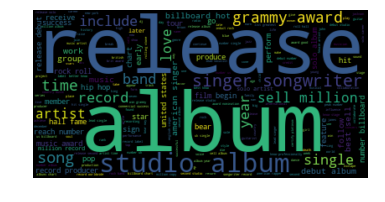

Pages in cluster: ['Meghan,_Duchess_of_Sussex', 'Jennifer_Aniston', 'Kylie_Jenner', 'Michael_B._Jordan', 'Burt_Reynolds', 'John_Krasinski', 'Tom_Hardy', 'Chris_Pratt', 'Jennifer_Lawrence', 'Fred_Rogers']


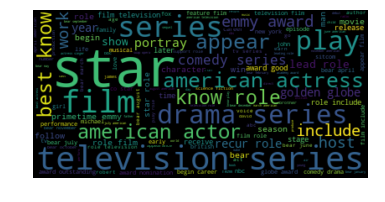

Pages in cluster: ['Jason_Momoa', 'Priyanka_Chopra', 'Sridevi', 'Sylvester_Stallone', 'Clint_Eastwood', 'Ryan_Reynolds', 'Chris_Hemsworth', 'Josh_Brolin', 'Keanu_Reeves', 'Mila_Kunis']


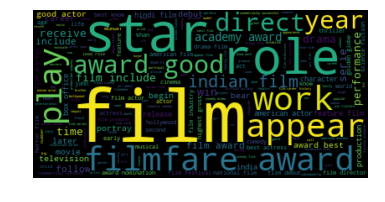

In [8]:
show_wordclouds_spectralcluster(bow_vecs, doc_ids, data, n_clusters=10)

In [0]:
# TF-IDF
tfidf_vecs = tfidf(data, doc_ids)

cluster variance: [1.76042675951404e-09, 1.5077906947029662e-09, 1.7261628983689045e-09, 1.6461540025985459e-09, 1.656503689959836e-09, 1.6334920150528183e-09, 1.3655794127471671e-09, 1.6020037386387328e-09, 1.6899588066619777e-09, 1.7057205261179982e-09]
cluster size: [2387, 299, 2143, 1049, 1078, 460, 222, 580, 978, 804]
Pages in cluster: ['Elizabeth_II', 'Elon_Musk', 'Stephen_Hawking', 'Anthony_Bourdain', 'Queen_Victoria', 'Stan_Lee', 'Meghan,_Duchess_of_Sussex', 'Princess_Margaret,_Countess_of_Snowdon', 'Charles,_Prince_of_Wales', 'Prince_Philip,_Duke_of_Edinburgh']


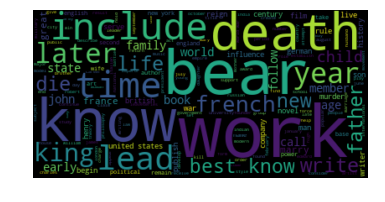

Pages in cluster: ['Tom_Brady', 'Nick_Foles', 'O._J._Simpson', 'Patrick_Mahomes', 'Colin_Kaepernick', 'Drew_Brees', 'Aaron_Rodgers', 'Terry_Crews', 'Michael_Oher', 'Rob_Gronkowski']


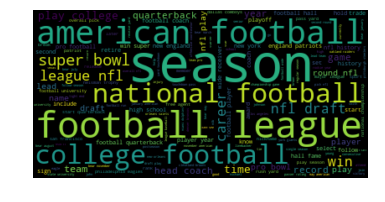

Pages in cluster: ['Jason_Momoa', 'Kylie_Jenner', 'Kim_Kardashian', 'Pete_Davidson', 'Michael_B._Jordan', 'Burt_Reynolds', 'Hailey_Baldwin', 'Chris_Pratt', 'Lisa_Bonet', 'Chadwick_Boseman']


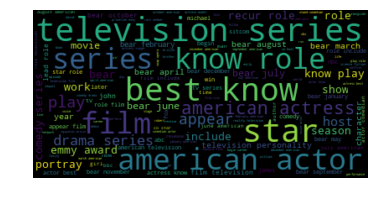

Pages in cluster: ['Tom_Cruise', 'Jennifer_Aniston', 'Scarlett_Johansson', 'Josh_Brolin', 'Emily_Blunt', 'Bradley_Cooper', 'John_Krasinski', 'Tom_Hardy', 'Jennifer_Lawrence', 'Leonardo_DiCaprio']


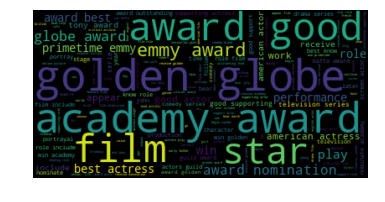

Pages in cluster: ['Cardi_B', 'Louis_Tomlinson', 'Freddie_Mercury', 'XXXTentacion', 'Ariana_Grande', '6ix9ine', 'Avicii', 'Donald_Glover', 'Nick_Jonas', 'Post_Malone']


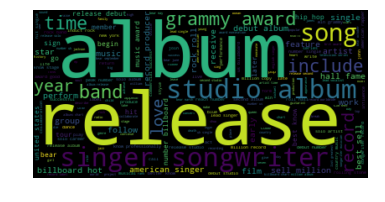

Pages in cluster: ['Dwayne_Johnson', 'Tonya_Harding', 'Khabib_Nurmagomedov', 'Conor_McGregor', 'Roger_Federer', 'John_Cena', 'Anthony_Joshua', 'Serena_Williams', 'Muhammad_Ali', 'Rafael_Nadal']


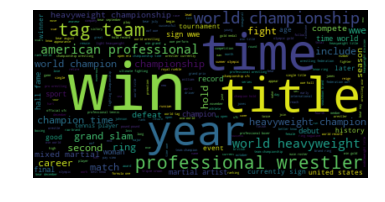

Pages in cluster: ['LeBron_James', 'Michael_Jordan', 'Stephen_Curry', 'Shaquille_O%27Neal', 'Kobe_Bryant', 'Kevin_Durant', 'Kareem_Abdul-Jabbar', 'Dwyane_Wade', 'Kyrie_Irving', 'Magic_Johnson']


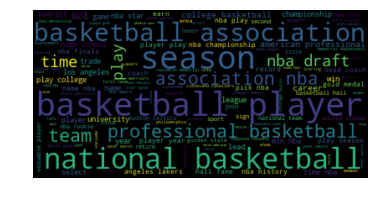

Pages in cluster: ['Cristiano_Ronaldo', 'Lionel_Messi', 'Kylian_Mbapp%C3%A9', 'Mohamed_Salah', 'Virat_Kohli', 'Neymar', 'Harry_Kane', 'Zlatan_Ibrahimovi%C4%87', 'David_Beckham', 'Pel%C3%A9']


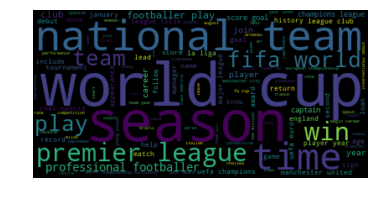

Pages in cluster: ['Priyanka_Chopra', 'Antonio_Maria_Magro', 'Sridevi', 'Sylvester_Stallone', 'Mahatma_Gandhi', 'Clint_Eastwood', 'Ryan_Reynolds', 'Chris_Hemsworth', 'Keanu_Reeves', 'Sanjay_Dutt']


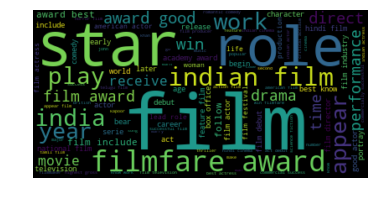

Pages in cluster: ['Donald_Trump', 'George_H._W._Bush', 'John_McCain', 'Winston_Churchill', 'Barack_Obama', 'P._T._Barnum', 'Adolf_Hitler', 'Pablo_Escobar', 'Brett_Kavanaugh', 'George_W._Bush']


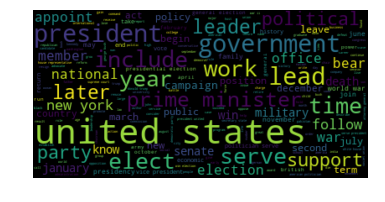

In [12]:
show_wordclouds_spectralcluster(tfidf_vecs, doc_ids, data, n_clusters=10)

cluster variance: [1.752836915432853e-09, 1.7037863444138608e-09, 1.4669803831898062e-09, 1.4972257844471962e-09, 1.6435939435149112e-09, 1.7291897821099295e-09, 1.3636216957219058e-09, 1.6397407915110195e-09, 1.7077000115720824e-09, 1.6035032875387186e-09, 1.7390864209947726e-09, 1.681161859095028e-09, 1.6358503660639093e-09]
cluster size: [1696, 1271, 181, 291, 945, 1137, 221, 331, 805, 581, 1006, 699, 836]
Pages in cluster: ['Elizabeth_II', 'Freddie_Mercury', 'Stephen_Hawking', 'Queen_Victoria', 'Meghan,_Duchess_of_Sussex', 'Princess_Margaret,_Countess_of_Snowdon', 'Charles,_Prince_of_Wales', 'Prince_Philip,_Duke_of_Edinburgh', 'George_VI', 'Diana,_Princess_of_Wales']


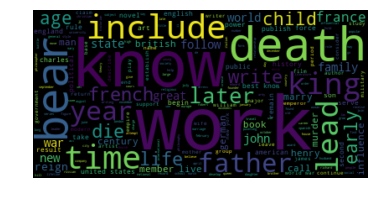

Pages in cluster: ['Jason_Momoa', 'Michael_B._Jordan', 'Burt_Reynolds', 'Clint_Eastwood', 'Ryan_Reynolds', 'Chris_Hemsworth', 'Josh_Brolin', 'Keanu_Reeves', 'John_Krasinski', 'Tom_Hardy']


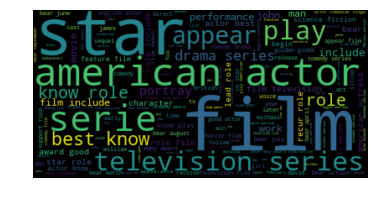

Pages in cluster: ['Dwayne_Johnson', 'John_Cena', 'The_Undertaker', 'Andr%C3%A9_the_Giant', 'Roman_Reigns', 'Dave_Bautista', 'Usain_Bolt', 'Triple_H', 'Nikki_Bella', 'Johnny_Weir']


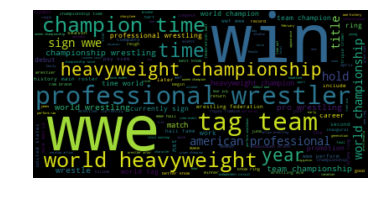

Pages in cluster: ['Tom_Brady', 'Nick_Foles', 'O._J._Simpson', 'Patrick_Mahomes', 'Colin_Kaepernick', 'Drew_Brees', 'Aaron_Rodgers', 'Terry_Crews', 'Michael_Oher', 'Rob_Gronkowski']


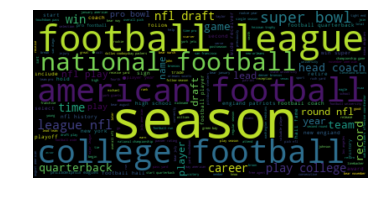

Pages in cluster: ['Cardi_B', 'Louis_Tomlinson', 'XXXTentacion', 'Ariana_Grande', '6ix9ine', 'Avicii', 'Donald_Glover', 'Nick_Jonas', 'Post_Malone', 'Michael_Jackson']


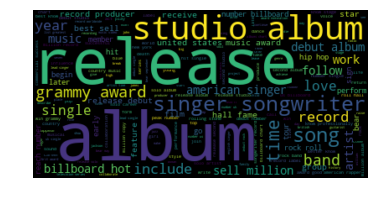

Pages in cluster: ['Kylie_Jenner', 'Scarlett_Johansson', 'Hailey_Baldwin', 'Lisa_Bonet', 'Mia_Khalifa', 'Rebecca_Ferguson', 'Millie_Bobby_Brown', 'Caitlyn_Jenner', 'Kendall_Jenner', 'Kris_Jenner']


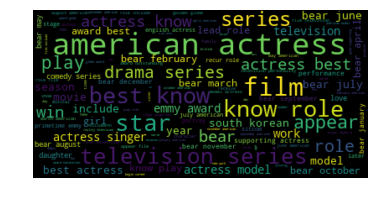

Pages in cluster: ['LeBron_James', 'Michael_Jordan', 'Stephen_Curry', 'Shaquille_O%27Neal', 'Kobe_Bryant', 'Kevin_Durant', 'Kareem_Abdul-Jabbar', 'Dwyane_Wade', 'Kyrie_Irving', 'Magic_Johnson']


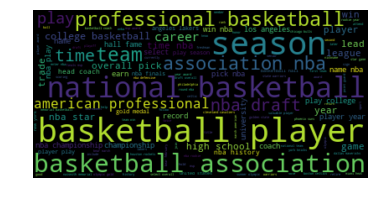

Pages in cluster: ['Tonya_Harding', 'Khabib_Nurmagomedov', 'Conor_McGregor', 'Roger_Federer', 'Anthony_Joshua', 'Serena_Williams', 'Muhammad_Ali', 'Rafael_Nadal', 'Tiger_Woods', 'Bruce_Lee']


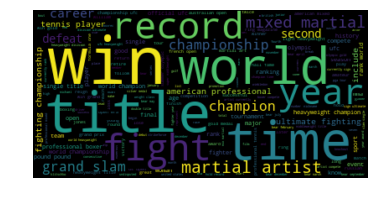

Pages in cluster: ['Donald_Trump', 'George_H._W._Bush', 'John_McCain', 'Winston_Churchill', 'Barack_Obama', 'P._T._Barnum', 'Adolf_Hitler', 'Pablo_Escobar', 'Brett_Kavanaugh', 'Jeff_Bezos']


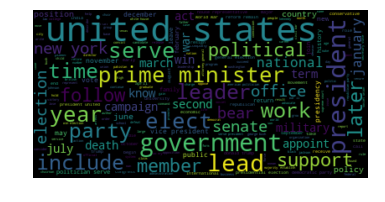

Pages in cluster: ['Cristiano_Ronaldo', 'Lionel_Messi', 'Kylian_Mbapp%C3%A9', 'Mohamed_Salah', 'Virat_Kohli', 'Neymar', 'Harry_Kane', 'Zlatan_Ibrahimovi%C4%87', 'David_Beckham', 'Pel%C3%A9']


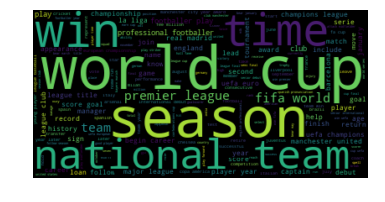

Pages in cluster: ['Elon_Musk', 'Anthony_Bourdain', 'Stan_Lee', 'Kim_Kardashian', 'Pete_Davidson', 'Rowan_Atkinson', 'Ellen_DeGeneres', 'Mark_Zuckerberg', 'Fred_Rogers', 'Oprah_Winfrey']


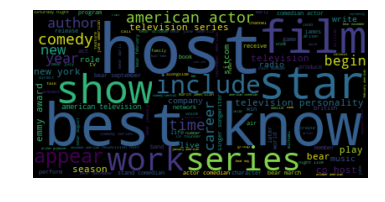

Pages in cluster: ['Priyanka_Chopra', 'Antonio_Maria_Magro', 'Sridevi', 'Mahatma_Gandhi', 'Sanjay_Dutt', 'Gal_Gadot', 'Deepika_Padukone', 'A._P._J._Abdul_Kalam', 'Tommy_Wiseau', 'Ranveer_Singh']


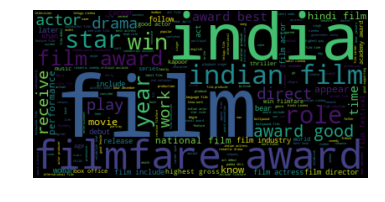

Pages in cluster: ['Sylvester_Stallone', 'Tom_Cruise', 'Jennifer_Aniston', 'Emily_Blunt', 'Bradley_Cooper', 'Jennifer_Lawrence', 'Leonardo_DiCaprio', 'Rami_Malek', 'Elizabeth_Olsen', 'Macaulay_Culkin']


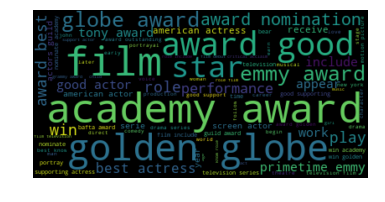

In [14]:
show_wordclouds_spectralcluster(tfidf_vecs, doc_ids, data, n_clusters=13)

In [0]:
# TF-IDF without IDF
tf_vecs = tfidf(data, doc_ids, use_idf=False)

cluster variance: [1.6939620056655153e-09, 1.4521812822695976e-09, 1.4682098572642027e-09, 1.5459377746540785e-09, 1.3642712616000997e-09, 1.4735379077120954e-09, 1.3705839631104112e-09, 1.3268504866919932e-09, 1.5103748396126033e-09, 1.5625681026577943e-09]
cluster size: [2357, 1104, 1035, 980, 973, 644, 553, 812, 879, 663]
Pages in cluster: ['Elizabeth_II', 'Elon_Musk', 'Stephen_Hawking', 'Donald_Trump', 'George_H._W._Bush', 'Queen_Victoria', 'Stan_Lee', 'John_McCain', 'Princess_Margaret,_Countess_of_Snowdon', 'Charles,_Prince_of_Wales']


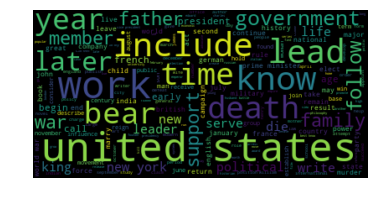

Pages in cluster: ['Meghan,_Duchess_of_Sussex', 'Kylie_Jenner', 'Kim_Kardashian', 'Michael_B._Jordan', 'Burt_Reynolds', 'John_Krasinski', 'Tom_Hardy', 'Chris_Pratt', 'Fred_Rogers', 'Blake_Lively']


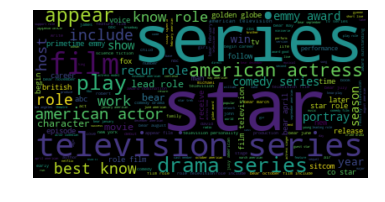

Pages in cluster: ['Cardi_B', 'Louis_Tomlinson', 'Freddie_Mercury', 'XXXTentacion', 'Ariana_Grande', '6ix9ine', 'Avicii', 'Donald_Glover', 'Nick_Jonas', 'Post_Malone']


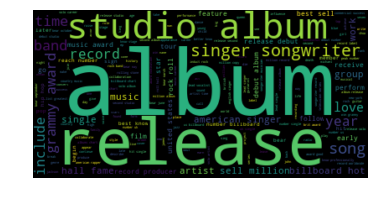

Pages in cluster: ['Antonio_Maria_Magro', 'Pete_Davidson', 'Chadwick_Boseman', 'Rowan_Atkinson', 'Macaulay_Culkin', 'Offset_(rapper)', 'Verne_Troyer', 'Chris_Pine', 'Daniel_Day-Lewis', 'Ray_Liotta']


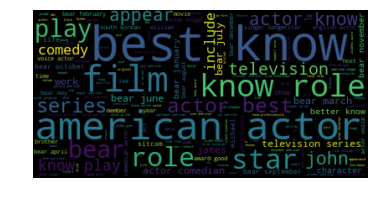

Pages in cluster: ['Jason_Momoa', 'Priyanka_Chopra', 'Sridevi', 'Sylvester_Stallone', 'Clint_Eastwood', 'Ryan_Reynolds', 'Chris_Hemsworth', 'Josh_Brolin', 'Keanu_Reeves', 'Arnold_Schwarzenegger']


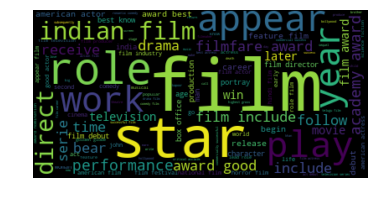

Pages in cluster: ['LeBron_James', 'Michael_Jordan', 'Tom_Brady', 'Stephen_Curry', 'Shaquille_O%27Neal', 'Kobe_Bryant', 'Nick_Foles', 'O._J._Simpson', 'Kevin_Durant', 'Patrick_Mahomes']


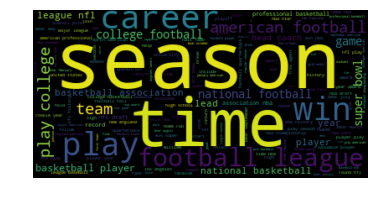

Pages in cluster: ['Cristiano_Ronaldo', 'Lionel_Messi', 'Kylian_Mbapp%C3%A9', 'Mohamed_Salah', 'Virat_Kohli', 'Neymar', 'William_Shakespeare', 'Harry_Kane', 'Zlatan_Ibrahimovi%C4%87', 'David_Beckham']


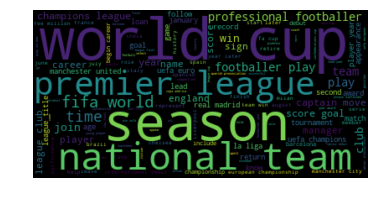

Pages in cluster: ['Tom_Cruise', 'Jennifer_Aniston', 'Emily_Blunt', 'Bradley_Cooper', 'Jennifer_Lawrence', 'Leonardo_DiCaprio', 'Rami_Malek', 'Ellen_DeGeneres', 'Elizabeth_Olsen', 'Robin_Williams']


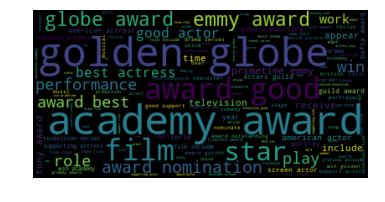

Pages in cluster: ['Scarlett_Johansson', 'Hailey_Baldwin', 'Lisa_Bonet', 'Melania_Trump', 'Mia_Khalifa', 'Kate_Hudson', 'Karen_Gillan', 'Asia_Argento', 'Anna_Faris', 'Joey_King']


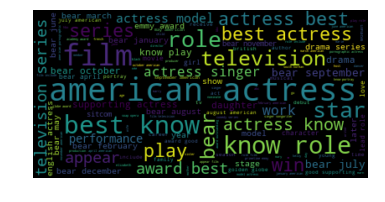

Pages in cluster: ['Anthony_Bourdain', 'Dwayne_Johnson', 'Tonya_Harding', 'Jeff_Bezos', 'Khabib_Nurmagomedov', 'Conor_McGregor', 'Roger_Federer', 'John_Cena', 'Mark_Zuckerberg', 'Bill_Gates']


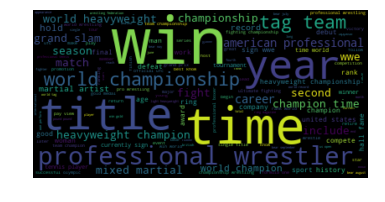

In [9]:
show_wordclouds_spectralcluster(tf_vecs, doc_ids, data, n_clusters=10)

cluster variance: [1.7032777422686677e-09, 1.5184903584770796e-09, 1.3768614391288565e-09, 1.5143008990092834e-09, 1.488288782399231e-09]
cluster size: [3251, 1430, 1827, 2320, 1172]
Pages in cluster: ['Elizabeth_II', 'Elon_Musk', 'Stephen_Hawking', 'Donald_Trump', 'Anthony_Bourdain', 'George_H._W._Bush', 'Queen_Victoria', 'Stan_Lee', 'John_McCain', 'Princess_Margaret,_Countess_of_Snowdon']


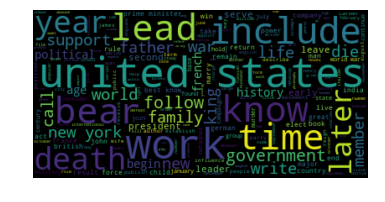

Pages in cluster: ['Cristiano_Ronaldo', 'Lionel_Messi', 'LeBron_James', 'Dwayne_Johnson', 'Michael_Jordan', 'Tom_Brady', 'Kylian_Mbapp%C3%A9', 'Mohamed_Salah', 'Roger_Federer', 'John_Cena']


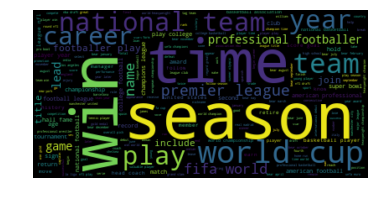

Pages in cluster: ['Jason_Momoa', 'Priyanka_Chopra', 'Antonio_Maria_Magro', 'Sridevi', 'Sylvester_Stallone', 'Tom_Cruise', 'Clint_Eastwood', 'Ryan_Reynolds', 'Scarlett_Johansson', 'Chris_Hemsworth']


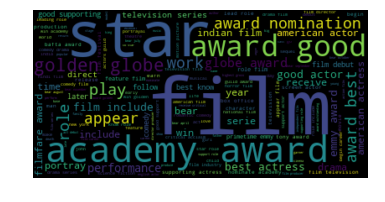

Pages in cluster: ['Meghan,_Duchess_of_Sussex', 'Jennifer_Aniston', 'Pete_Davidson', 'Michael_B._Jordan', 'Burt_Reynolds', 'Hailey_Baldwin', 'Lisa_Bonet', 'Chadwick_Boseman', 'Fred_Rogers', 'Blake_Lively']


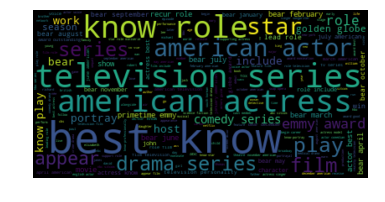

Pages in cluster: ['Cardi_B', 'Louis_Tomlinson', 'Freddie_Mercury', 'XXXTentacion', 'Ariana_Grande', '6ix9ine', 'Avicii', 'Donald_Glover', 'Nick_Jonas', 'Post_Malone']


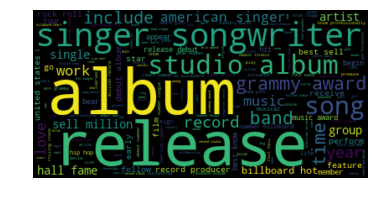

In [10]:
show_wordclouds_spectralcluster(tf_vecs, doc_ids, data, n_clusters=5)